#  Introdução

Com o aumento da concorrência e das opções disponíveis no mercado, entender o comportamento dos consumidores se tornou essencial para que as empresas possam se destacar e manter um relacionamento duradouro com seus clientes. A análise de dados tem papel fundamental nesse processo, pois permite transformar grandes volumes de informações em insights que ajudam a compreender melhor quem são os consumidores, o que compram, quando e por quê.

Dentro desse contexto, a **segmentação de clientes** surge como uma estratégia importante para identificar grupos de consumidores com características e comportamentos semelhantes. A partir dessa identificação, é possível direcionar ações de marketing mais eficazes, personalizar ofertas e melhorar a experiência do cliente.

Neste projeto, será realizada uma análise exploratória do conjunto de dados **Consumer Behavior and Shopping Habits Dataset**, disponível no [Kaggle](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset). Esses dados reúnem informações detalhadas sobre o perfil e os hábitos de compra de diferentes consumidores, incluindo aspectos demográficos, histórico de compras, preferências por produtos, uso de descontos, tipo de entrega, entre outros fatores.

A ideia central é compreender como essas variáveis se relacionam e identificar padrões de comportamento que possam ser utilizados para dividir os consumidores em grupos (ou segmentos) com características semelhantes. Essa etapa inicial de exploração dos dados será fundamental para embasar futuras análises mais aprofundadas, como modelos de **clusterização** e **predição de comportamento de compra**.



#  Descrição do Conjunto de Dados

O conjunto de dados reúne informações sobre o perfil e os hábitos de compra de diferentes consumidores, tanto em lojas físicas quanto em canais online. Ele foi construído com o objetivo de oferecer uma visão ampla sobre o comportamento do cliente, permitindo análises relacionadas à **segmentação**, **fidelização** e **preferências de consumo**.

A seguir, está a descrição detalhada de cada variável presente no dataset:

| Variável                  | Descrição                                                       |
| ------------------------- | --------------------------------------------------------------- |
| **Customer ID**           | Identificador único de cada cliente.                            |
| **Age**                   | Idade do cliente.                                               |
| **Gender**                | Gênero do cliente.                                              |
| **Item Purchased**        | Nome do produto adquirido.                                      |
| **Category**              | Categoria do produto (exemplo: roupas, eletrônicos, alimentos). |
| **Purchase Amount (USD)** | Valor gasto na compra, em dólares.                              |
| **Location**              | Local onde a compra foi realizada.                              |
| **Size**                  | Tamanho do produto, quando aplicável.                           |
| **Color**                 | Cor do produto adquirido.                                       |
| **Season**                | Estação do ano associada à compra.                              |
| **Review Rating**         | Avaliação dada pelo cliente ao produto.                         |


<a id="cd"></a>

# 1) Carregamento dos dados

In [2]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans


path = kagglehub.dataset_download("zeesolver/consumer-behavior-and-shopping-habits-dataset")

df = pd.read_csv(f'{path}/shopping_behavior_updated.csv')
df.head()

c:\Users\hudso\Desktop\aps-ecommerce-clustering\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


<a id="eda"></a>

## 2) Análise Exploratória

Nessa etapa inicial, o objetivo é explorar o conjunto de dados para entender sua estrutura, identificar padrões e detectar possíveis problemas que possam afetar análises futuras.

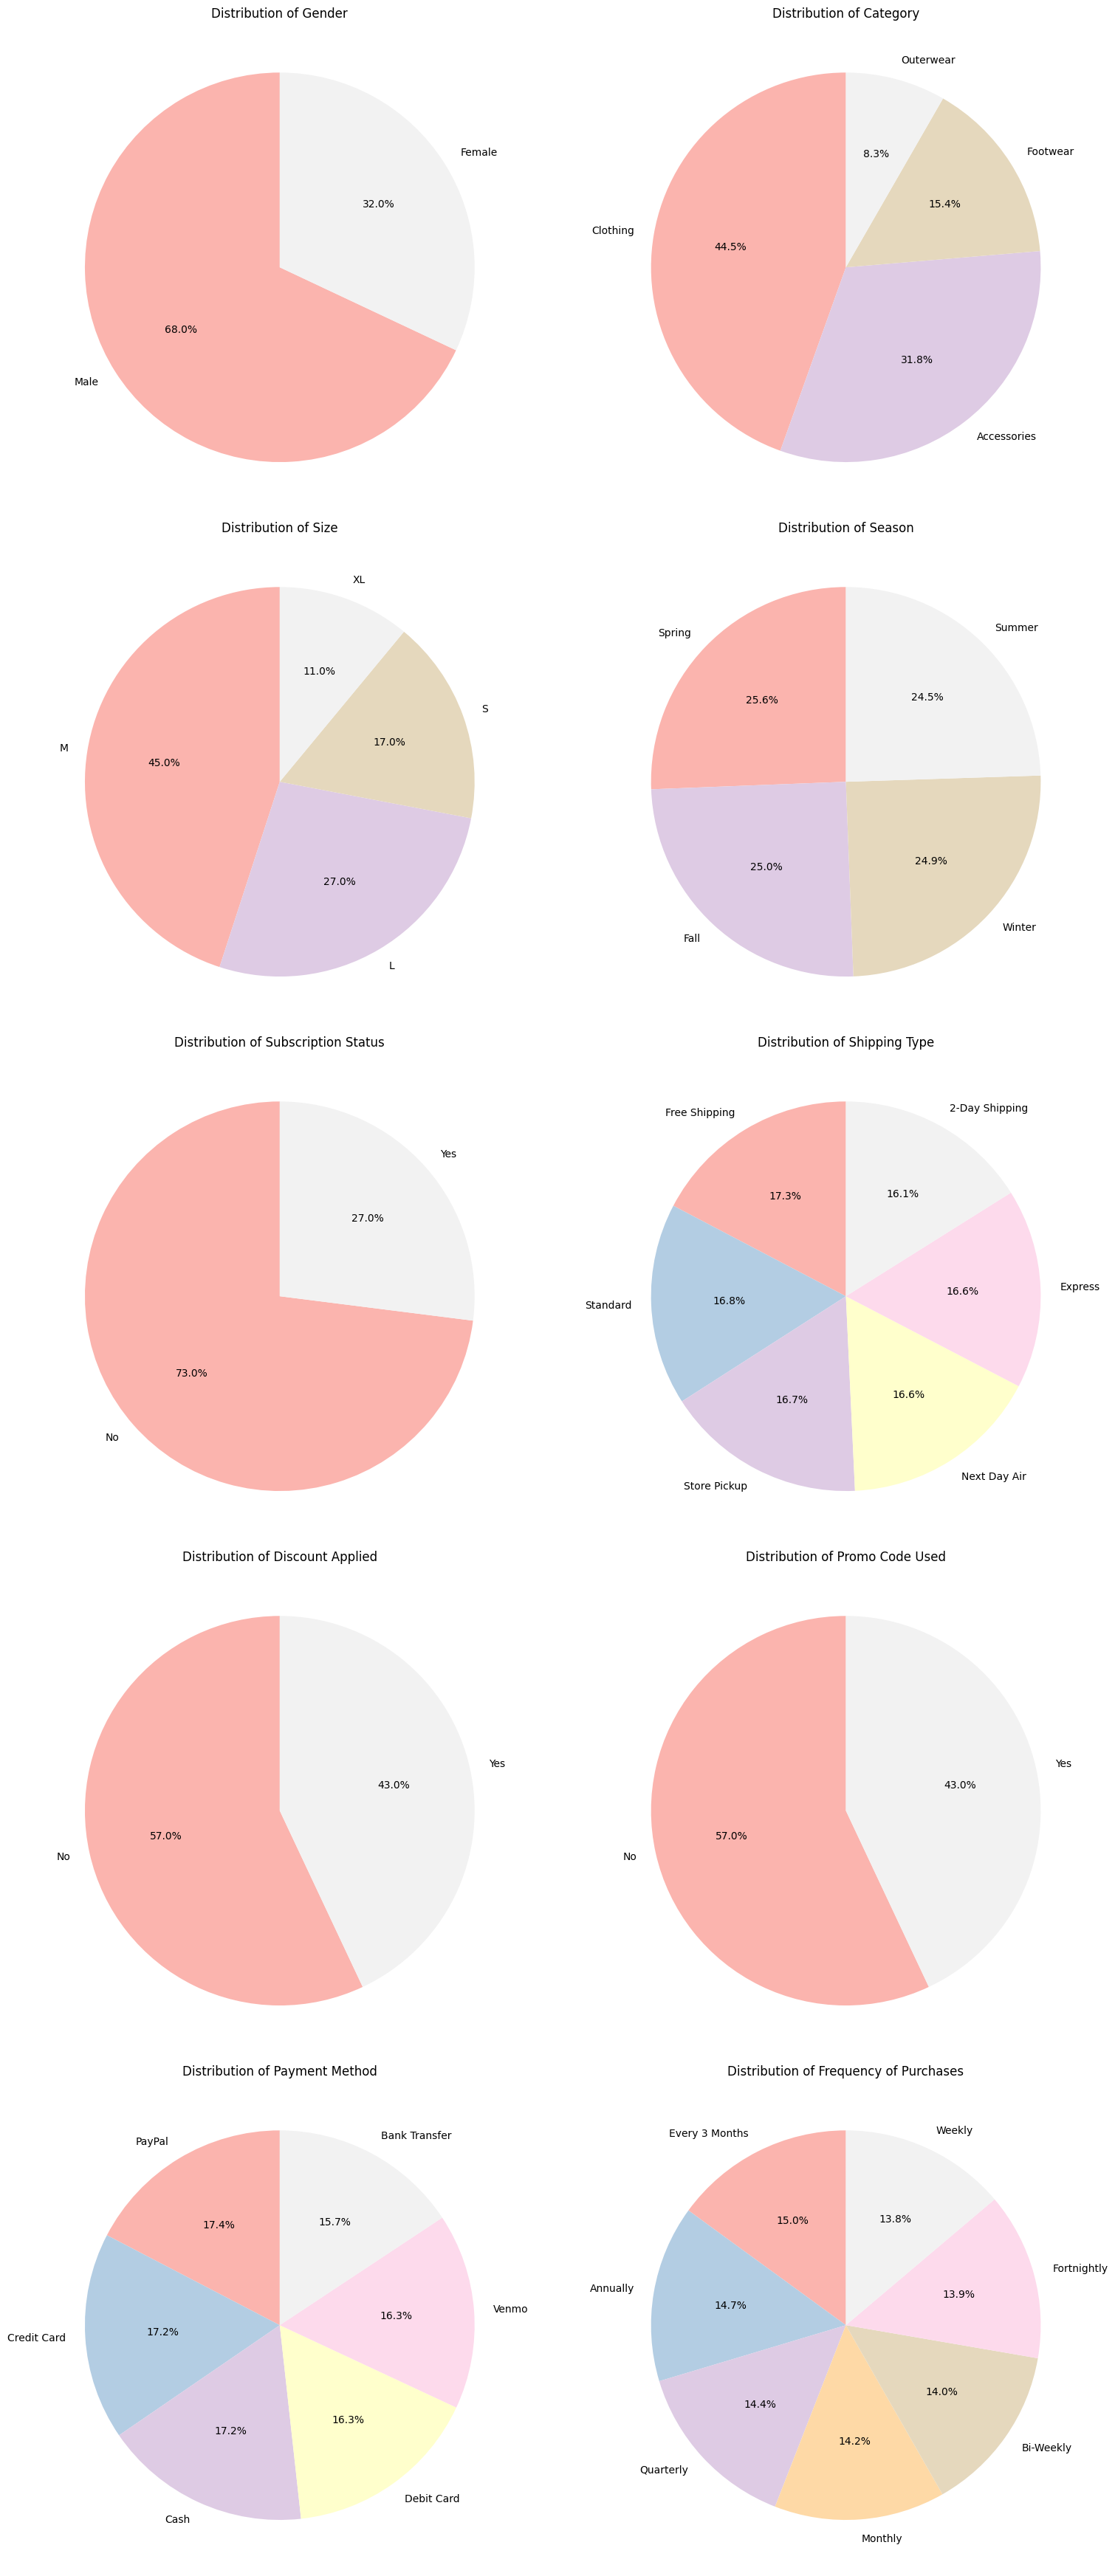

In [3]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 7 * n_rows))
axes = axes.flatten() if len(cols_to_plot) > 1 else [axes]

for idx, col in enumerate(cols_to_plot):
    value_counts = df[col].value_counts()
    value_counts.plot.pie(
        ax=axes[idx], 
        autopct='%1.1f%%', 
        startangle=90, 
        cmap='Pastel1', 
        legend=False
    )
    axes[idx].set_ylabel('')
    axes[idx].set_title(f'Distribution of {col}')

for ax in axes[len(cols_to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



In [4]:
# Distribuição das variáveis (hist, boxplot, describe())
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


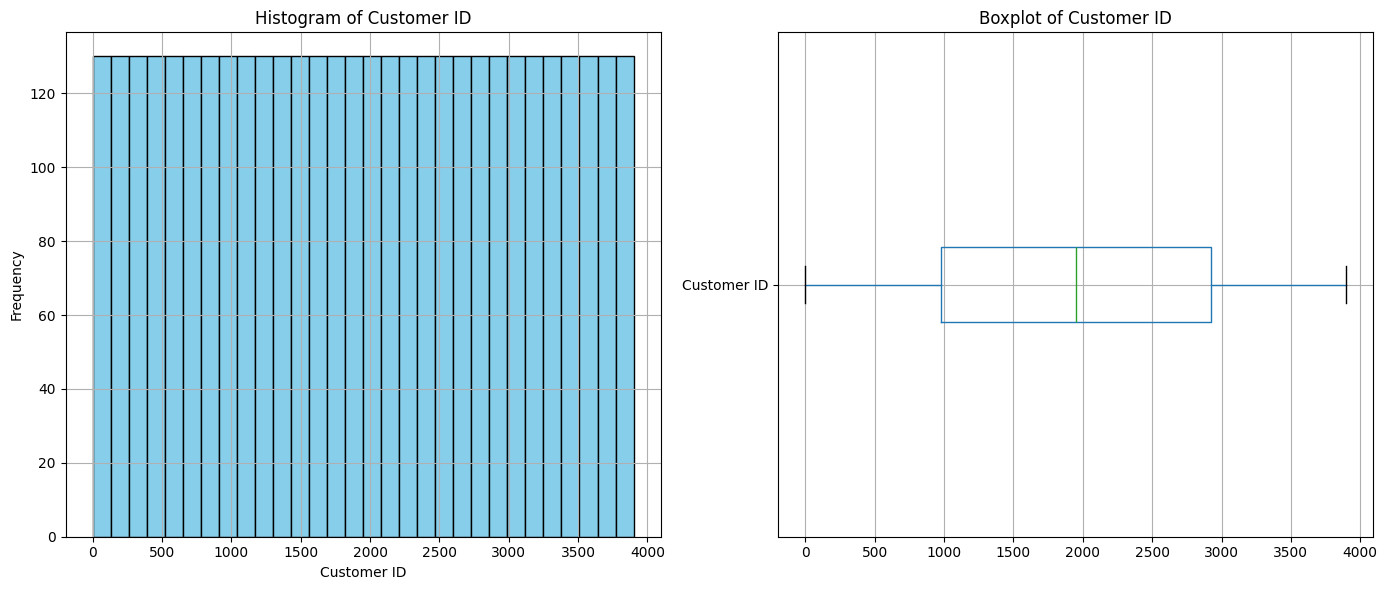

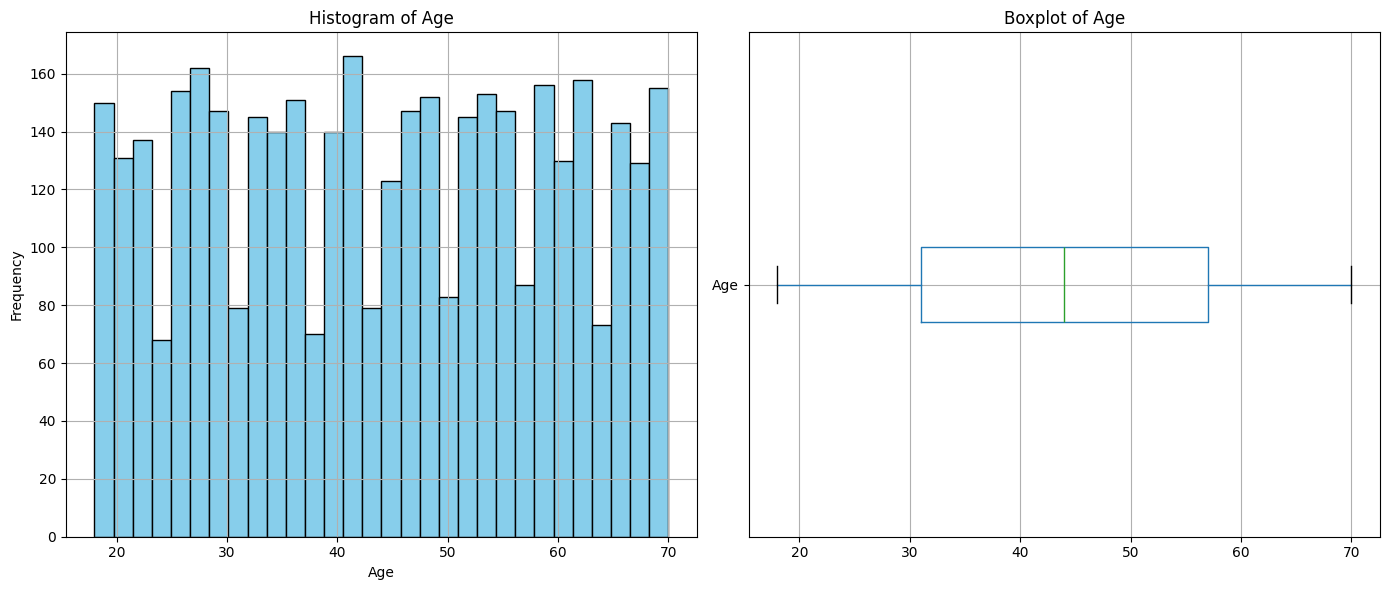

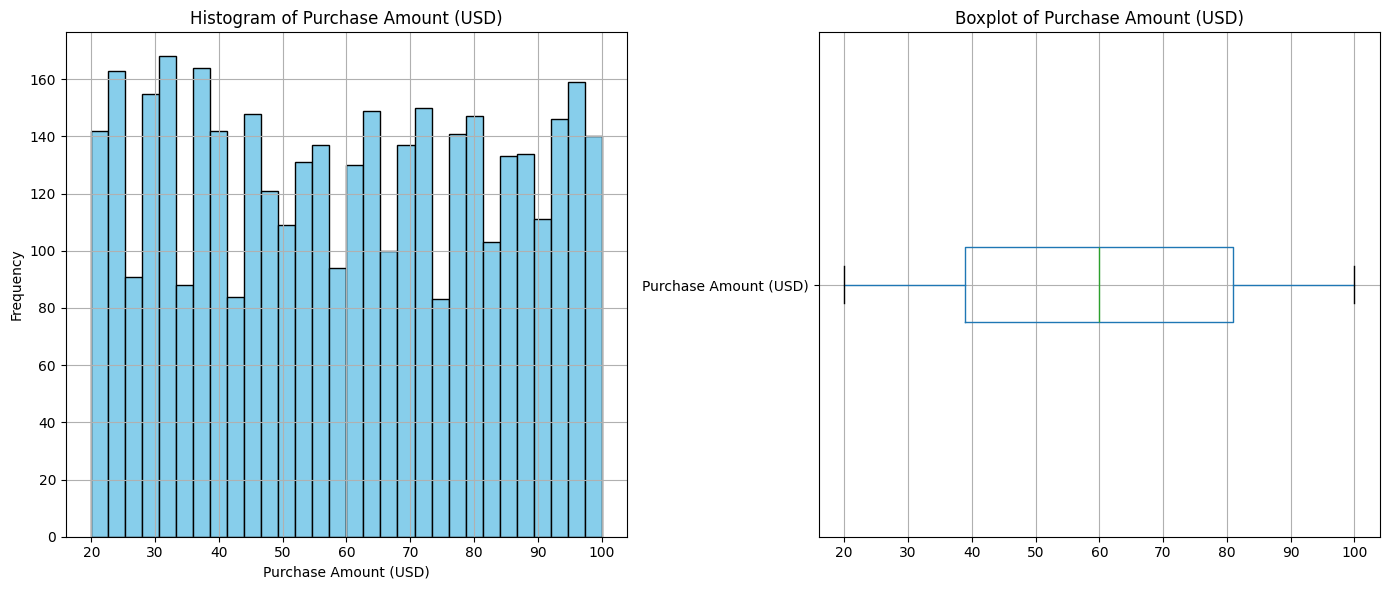

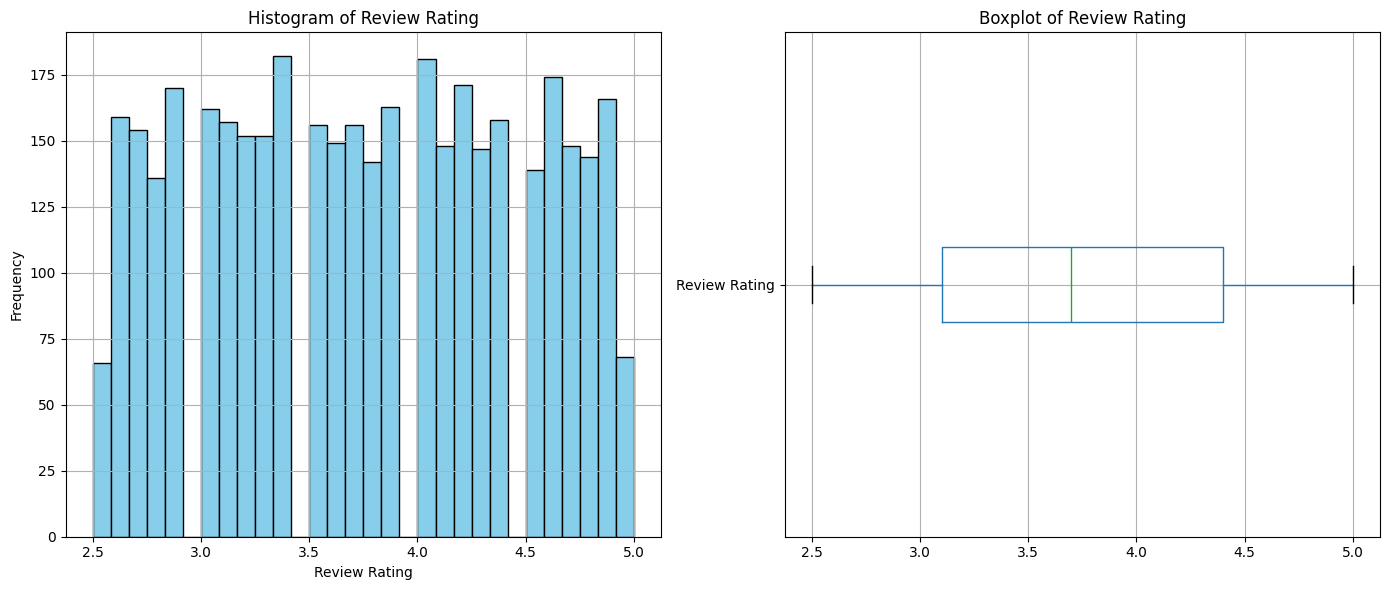

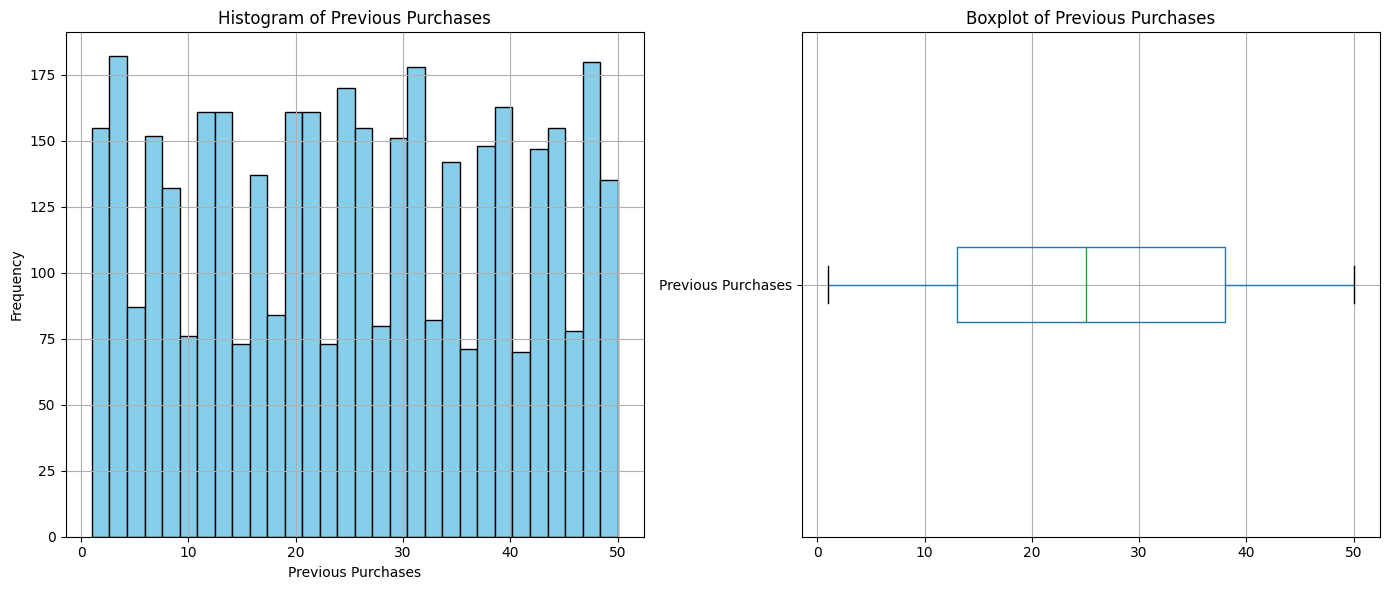

In [ ]:
for col in numerical_cols:
    if col != '	Customer ID':
        plt.figure(figsize=(14, 6))
        
        plt.subplot(1, 2, 1)
        df[col].hist(bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        plt.subplot(1, 2, 2)
        df.boxplot(column=col, vert=False)
        plt.title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

Com base na análise realizada, é possível observar que os dados apresentam características adequadas para serem utilizados em processos de clusterização. Caso todos os valores estivessem excessivamente concentrados ou demasiadamente dispersos, isso poderia comprometer a performance dos modelos que aplicaremos na etapa de agrupamento. Dessa forma, é viável prosseguir com o procedimento de clusterização para investigar posteriormente o comportamento de cada cluster e entender os fatores que contribuem para essas diferenças.

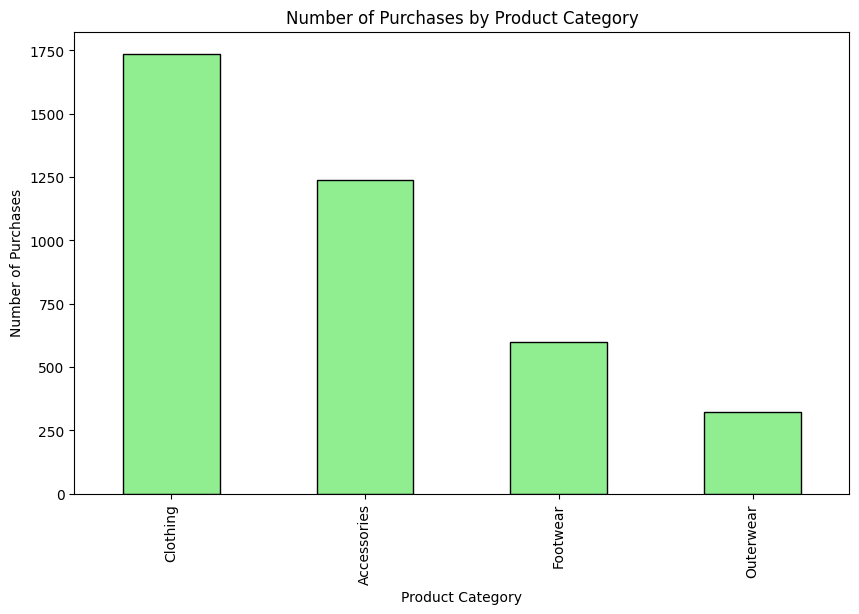

In [9]:
# Frequência de compras por categoria, gênero, estação etc.
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot.bar(color='lightgreen', edgecolor='black')
plt.title('Number of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()


<a id="prep"></a>

## 3) Limpeza e Pré-processamento

- **Numéricas**: padronização com `StandardScaler`  
- **Categóricas**: one-hot encoding (`OneHotEncoder(handle_unknown="ignore")`)

> Esta etapa evita que a escala de variáveis distorça as distâncias no K-Means e nas projeções.


In [10]:
# Tratamento de valores ausentes
missing_summary = df.isnull().sum()
print("Missing Values Summary:")
print(missing_summary[missing_summary > 0])


Missing Values Summary:
Series([], dtype: int64)


In [11]:
# Codificação categórica (OneHotEncoder)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = ohe.fit_transform(df[categorical_cols])

In [12]:
# Escalonamento (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data = scaler.fit_transform(df[numerical_cols])


# Modelagem (K-Means, MDS, t-SNE)

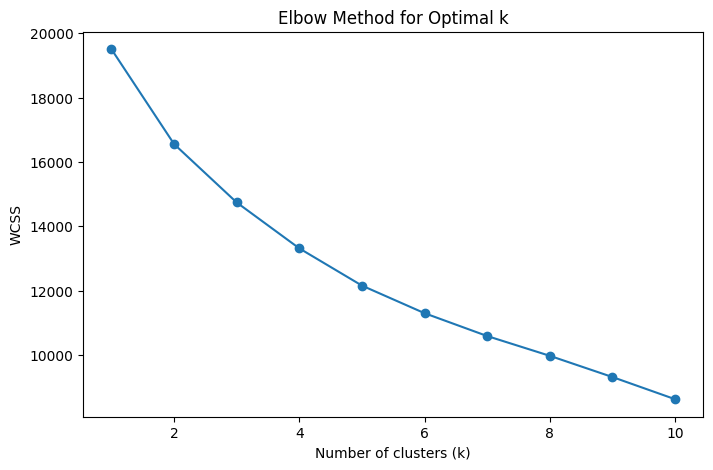

In [18]:
# Determinação de k ótimo usando o método do cotovelo
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


c:\Users\hudso\Desktop\aps-ecommerce-clustering\env\lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


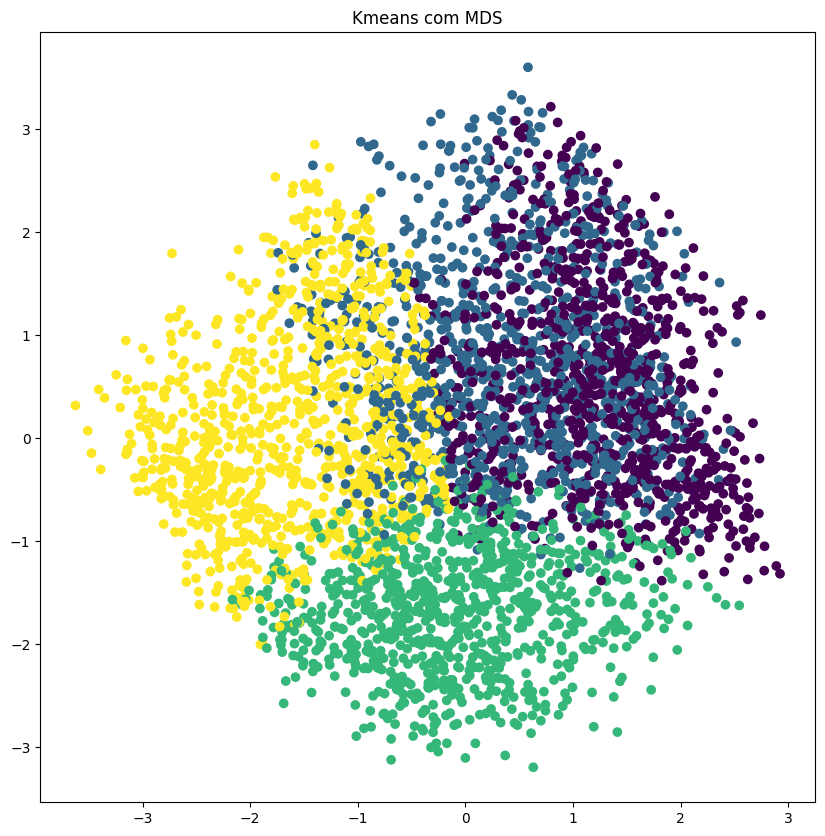

In [22]:
# Clusterização com MDS

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

n_cluster = 4
mds = MDS(n_components=3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()

# Aplique o K-means aos dados normalizados
kmeans = KMeans(n_clusters=n_cluster, random_state=42)

X = df[numerical_data].drop(columns=['Customer ID']).values

# criar o pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('mds', mds)
])

# fit_transform
X_mds = pipeline.fit_transform(X)

# fit
kmeans.fit(X_mds)

# predict
y_pred = kmeans.predict(X_mds)

# plotar o gráfico
plt.figure(figsize=(10,10))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_pred)
plt.title('Kmeans com MDS')
plt.show()


# Interpretação dos Clusters (Personas)

In [ ]:
# Perfil médio dos grupos
df['Cluster'] = y_pred
df.groupby('Cluster')[numerical_cols].mean()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Cluster,,,,,
0,1919.389061,54.377709,69.222910,3.828173,12.776058
1,1667.163324,29.547278,46.408787,3.778415,22.509074
2,2014.975610,55.638581,41.702882,3.734146,34.526608
3,2224.067210,38.750509,81.260692,3.656925,32.363544


# Conclusões e Recomendações

In [ ]:
# A desenvolver